In [28]:
import json
from pathlib import Path

root_data_path = Path(
    "/home/ohad/work/quantum_variational_combinatorial_optimization/qemc/",
    "EXP_DATA",
    "ref_29_table1_comparison",
)

graph_names = [
    "graph_random_graph__p_0.307__density_0.30__seed_0",
    "graph_random_graph__p_0.350__density_0.35__seed_0",
    "graph_random_graph__p_0.398__density_0.40__seed_0",
    "graph_random_graph__p_0.441__density_0.45__seed_0"
]

qemc_cuts_7_layers = []
qemc_cuts_10_layers = []

for graph_name in graph_names:
    data_path = Path(
        root_data_path,
        graph_name,
        "backend_statevector_simulator"
    )
    
    with open(Path(data_path, "total_backend_configurations_metadata.json"), "r") as f:
        data = json.load(f)
        
    qemc_cuts_7_layers.append(data["configurations"]["1"]["average_best_cut"])
    qemc_cuts_10_layers.append(data["configurations"]["2"]["average_best_cut"])

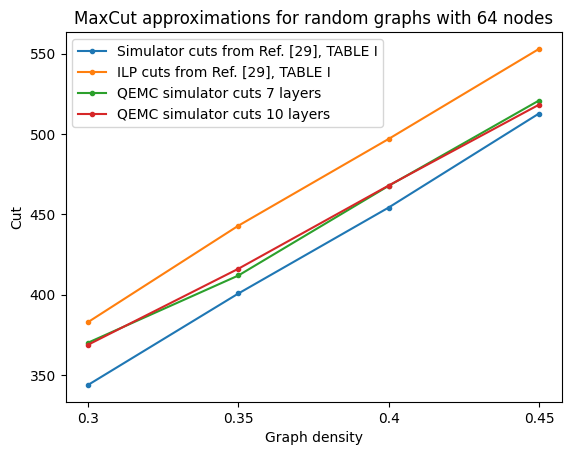

In [31]:
import matplotlib.pyplot as plt

densities = [0.3, 0.35, 0.4, 0.45]
ilp_cuts = [383, 443, 497, 553]
ref29_quantum_simulator_cuts = [343.9, 400.8, 454.3, 512.8]

plt.plot(densities, ref29_quantum_simulator_cuts, label="Simulator cuts from Ref. [29], TABLE I", marker=".")
plt.plot(densities, ilp_cuts, label="ILP cuts from Ref. [29], TABLE I", marker=".")
plt.plot(densities, qemc_cuts_7_layers, label="QEMC simulator cuts 7 layers", marker=".")
plt.plot(densities, qemc_cuts_10_layers, label="QEMC simulator cuts 10 layers", marker=".")

plt.xticks(ticks=densities, labels=densities)

plt.xlabel("Graph density")
plt.ylabel("Cut")
plt.title("MaxCut approximations for random graphs with 64 nodes")

plt.legend()
plt.savefig("ref29_table1_comparison_fig.png")
plt.show()